# Customer Segmentation
Ari Sulistiyo Prabowo, Data Scientist in Rukita

This notebook aims to analyzing the transaction data occuring between 01/12/2009 and 09/12/2010 for a UK-based and registered non-store online retail. Based on this notebook, I will analysis the behaviours of customer and make a model to anticipate the purchase that will be made by the new customer.

____

**1. Data Preparation**
    - Percentage the NaN value in each variable
    - Deleting the NaN value
    - Finding the duplicate value and delete it
    
**2. Exploratory Data**
    - Exploring countries
    - Customer 
        * Behaviour for buying and selling product
        * Matching the buying and selling
    - Product
        * StockCode 
        * Price
        
**3. Product Categories**
    - Description of products
    - Defining the product categories
        * Data encoding
        * Clustering the product
        * Characterizing the content of clusters
        
**4. Customer Categories**
    - Grouping the products
    - Grouping the order
    - Creating customer categories
    
**5. Modelling Classification**
    - SVC Classifier
    - KN Neighbors
    - Decision Tree
    - Random Forest
    - Voting the best model
    - Assessing the model with AUC ROC
    
**6. Testing**
    - Testing the prediction

# 1. Data Preparation

In [120]:
#Load the module
import numpy as np
import pandas as pd

#Visualization module
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as mpatches
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import iplot

#Wordcloud module
from wordcloud import WordCloud
import datetime, nltk

#sklearn module
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import preprocessing, metrics, feature_selection
from sklearn.svm import SVC
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)

I load the dataset and show a brief information regarding:
- The row and column
- The information of type of variable and the null value
- The brief statistic of numerical variable
- The first five data

In [2]:
#Reading the data
directory = '/Users/ari/Documents/Data Ari/Data Science/Project/Ecommerce'
data_2009_2010 = pd.read_excel(f'{directory}/online_retail.xlsx', sheet_names = 'Year 2009-2010')
data_2010_2011 = pd.read_excel(f'{directory}/online_retail.xlsx', sheet_names = 'Year 2010-2011')
data = pd.concat([data_2009_2010, data_2010_2011])

#Dimension of data
print('Dimension of dataframe: ', data.shape)
print()

#Brief statistic
display(data.describe())

#Type of variable and null value
type_null = pd.DataFrame(data.dtypes).T.rename(index = {0: 'Columns Type'})
type_null = type_null.append(pd.DataFrame(data.isnull().sum()).T.rename(index = {0: 'Amount of Null Values'}))
type_null = type_null.append(pd.DataFrame(data.isnull().sum()/data.shape[0]*100).T.rename(index = {0: 'Percentage of Null Values'}))
display(type_null)


#First five data
display(data.head())

Dimension of dataframe:  (1050922, 8)



Quantity         Price    Customer ID
count  1.050922e+06  1.050922e+06  835068.000000
mean   1.033767e+01  4.688834e+00   15360.645478
std    1.074241e+02  1.461268e+02    1680.810309
min   -9.600000e+03 -5.359436e+04   12346.000000
25%    1.000000e+00  1.250000e+00   13983.000000
50%    3.000000e+00  2.100000e+00   15311.000000
75%    1.000000e+01  4.210000e+00   16799.000000
max    1.915200e+04  2.511109e+04   18287.000000

Invoice StockCode Description Quantity  \
Columns Type               object    object      object    int64   
Amount of Null Values           0         0        5856        0   
Percentage of Null Values       0         0    0.557225        0   

                              InvoiceDate    Price Customer ID Country  
Columns Type               datetime64[ns]  float64     float64  object  
Amount of Null Values                   0        0      215854       0  
Percentage of Null Values               0        0     20.5395       0

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom

From the data shows that there are around 20% null value in customerID, the number is too high and it will affect the rest of analysis if we keep this null value. So, I delete the null values from dataframe

In [3]:
#Renaming the customerID
data.rename(columns = {'Customer ID': 'CustomerID'}, inplace = True)

#Dropping the null values
data.dropna(axis = 0, subset = ['CustomerID'], inplace = True)
print('Dimension of data: ', data.shape)

#Shows again the percentage of null value
type_null = pd.DataFrame(data.dtypes).T.rename(index = {0: 'Columns Type'})
type_null = type_null.append(pd.DataFrame(data.isnull().sum()).T.rename(index = {0: 'Amount of Null Values'}))
type_null = type_null.append(pd.DataFrame(data.isnull().sum()/data.shape[0]*100).T.rename(index = {0: 'Percentage of Null Values'}))
display(type_null)

Dimension of data:  (835068, 8)


Invoice StockCode Description Quantity  \
Columns Type               object    object      object    int64   
Amount of Null Values           0         0           0        0   
Percentage of Null Values       0         0           0        0   

                              InvoiceDate    Price CustomerID Country  
Columns Type               datetime64[ns]  float64    float64  object  
Amount of Null Values                   0        0          0       0  
Percentage of Null Values               0        0          0       0

After deleting the null values from dataframe, the data looks so great and clear. However, I am wondering on the duplicate data in dataframe. So, I delete the duplicate data and shows what percentage of duplicate values

In [4]:
#Checking the duplicate values
duplicate_values = data.duplicated().sum() / data.shape[0] * 100
print('Percentage of Duplicate Values: {:.2f}%'.format(duplicate_values))
print('Lose data around', format(data.duplicated().sum()))

#Dropping the duplicate values
data.drop_duplicates(inplace = True)

Percentage of Duplicate Values: 50.81%
Lose data around 424305


It is really shocked to know that half of dataframe after deleting null values and duplicate values we only have around 400.000 data in dataframe. Now, I am going to know what is the range of date that still exists. After that, I want to visualize the overall transaction.

In [5]:
#set the transaction variables
transaction = data.copy()
transaction['transaction'] = 1

#normalizing the date and grouping the overall transaction each date
transaction['InvoiceDate'] = transaction['InvoiceDate'].dt.normalize() #delete the time
transaction = transaction.groupby('InvoiceDate')['transaction'].sum().reset_index()

print('The Start Date of Transaction:', transaction['InvoiceDate'].min())
print('The Last Date of Transaction:', transaction['InvoiceDate'].max())

#Visualizing the overall transaction each date
fig = px.area(transaction, x = 'InvoiceDate', y = 'transaction')
fig.update_layout(xaxis_rangeslider_visible = True)
fig.show()

The Start Date of Transaction: 2009-12-01 00:00:00
The Last Date of Transaction: 2010-12-09 00:00:00


On the above result, it seems like our data is valid from December 2010 until December 2011. The visualization shows also that there is no empty transaction due to cleansing with the NaN value.

# 2. Exploratory Data

The dataframe contains eight variables such as:
1. Invoice: It is a unique number with 6 digits to indicate the specific transaction, and if it begins with 'c' means it cancels the transaction
2. StockCode: It is the number with 5 digits that indicate the specific product
3. Description: The description of the product
4. Quantity: The amount of product 
5. InvoiceDate: The date and time when the transaction is generated
6. Price: The price of one product 
7. CustomerID: The unique number with the specific customer
8. Country: Country name which customer resides

## 2.1 Countries

We have done delete the NaN values and the duplicate values. Now, I am going to look the countries which doing an order.

In [6]:
#Finding how many countries that transactions are generated
countries = data[['CustomerID', 'Invoice', 'Country']].groupby(['CustomerID', 'Invoice', 'Country']).count()
countries = countries.reset_index(drop=False)
amount_country = countries['Country'].value_counts().reset_index()

print('Total Country:', len(amount_country))

Total Country: 37


In [7]:
#Mapping the order
fig = go.Figure(data=go.Choropleth(
        locations = amount_country['index'],
        locationmode = 'country names',
        z = amount_country['Country'],
        text = amount_country['index'],
        colorscale = 'YlGn',
        autocolorscale = False,
        reversescale = False,
        marker_line_color = 'darkgray',
        marker_line_width = 0.8,
        colorbar_tickprefix = '',
        colorbar_title = 'Number<br>Orders',))

fig.update_layout(
        title_text = 'Number of Orders per Country',
        geo = dict(showframe = False,
                   showcoastlines = False,
                   projection_type = 'equirectangular'),
        annotations = [dict(
                   x = 0.55,
                   y = 0.1,
                   xref = 'paper',
                   yref = 'paper',
                   text='Source: <a href="https://archive.ics.uci.edu/ml/datasets/Online+Retail+II">\
                   UCI Machine Learning Repository</a>',
            showarrow = False
    )]
)

fig.show()

We see that the highest order in dataframe is in United Kingdom (UK) 

## 2.2 Customer and Product 

We have around 400.000 data in dataframe and I want to retrieve the number of customer, number of products, and number of transaction

In [8]:
pd.DataFrame([{'Product':len(data['Description'].value_counts()),
               'Customer':len(data['CustomerID'].value_counts()),
               'Transaction':len(data['Invoice'].value_counts())}], columns = ['Product','Customer','Transaction'],
               index = ['Quantity'])

Product  Customer  Transaction
Quantity     4459      4383        23587

From the table, it can be seen that there are 4383 customers that buy 4459 different products and the number of transactions carried out is 23587.

I try to retrieve how many products in each transaction

In [9]:
nb_product = data.groupby(by=['CustomerID','Invoice'], as_index = False)['InvoiceDate'].count()
nb_product = nb_product.rename(columns = {'Invoice':'InvoiceNo'})
nb_product.sort_values('CustomerID', ascending=True)[:10]

CustomerID InvoiceNo  InvoiceDate
0      12346.0    491725            1
14     12346.0   C525274            1
13     12346.0   C525099            1
12     12346.0   C514024            9
11     12346.0   C495800            1
9      12346.0    499763            5
8      12346.0    495295            1
10     12346.0    513774           19
6      12346.0    493412            1
5      12346.0    493410            1

It is seen that there is a unique values in transaction that there is 'C' value which means "Cancellation". 

### 2.2.1 Cancellation 

In [10]:
nb_product['Cancellation Order'] = nb_product['InvoiceNo'].astype(str).apply(lambda x:int('C' in x))
display(nb_product[5:15])
total_cancel = nb_product['Cancellation Order'].sum()
total_transaction = nb_product.shape[0]
print('The percentage of cancellation ({}/{}): {:.2f}%'.format(total_cancel, total_transaction,
                                                             total_cancel/total_transaction*100))

CustomerID InvoiceNo  InvoiceDate  Cancellation Order
5      12346.0    493410            1                   0
6      12346.0    493412            1                   0
7      12346.0    494450            1                   0
8      12346.0    495295            1                   0
9      12346.0    499763            5                   0
10     12346.0    513774           19                   0
11     12346.0   C495800            1                   1
12     12346.0   C514024            9                   1
13     12346.0   C525099            1                   1
14     12346.0   C525274            1                   1

The percentage of cancellation (4372/23587): 18.54%


It shocks me that customers cancel their transaction around 18%. I am going to check if there is any cancellation of a transaction that has previously been done

In [11]:
data_check = data[data['Quantity'] < 0][['StockCode','Description','Quantity','CustomerID','InvoiceDate']]

for index, col in data_check.iterrows():
    if data[(data['CustomerID'] == col[0]) & (data['Quantity'] == -col[2]) & 
            (data['Description'] == col[1]) & (data['InvoiceDate'] < col[4])].shape[0] == 0:
        print(data_check.loc[index])
        print(15*'-'+'>'+' Hypothesis Is not Fulfilled')
        break

StockCode                         22087
Description    PAPER BUNTING WHITE LACE
Quantity                            -12
CustomerID                        16321
InvoiceDate         2009-12-01 10:33:00
Name: 178, dtype: object
---------------> Hypothesis Is not Fulfilled


In [12]:
display(data[(data['CustomerID'] == 16321) & (data['Description'] == 'PAPER BUNTING WHITE LACE')])

display(data[(data['CustomerID'] == 15005) & (data['Description'] == 'RED SPOTTY BISCUIT TIN')])

Invoice StockCode               Description  Quantity  \
178  C489449     22087  PAPER BUNTING WHITE LACE       -12   
187   489450     22087  PAPER BUNTING WHITE LACE        12   

            InvoiceDate  Price  CustomerID    Country  
178 2009-12-01 10:33:00   2.95     16321.0  Australia  
187 2009-12-01 10:36:00   2.95     16321.0  Australia

Invoice StockCode             Description  Quantity  \
1426    C489568     21218  RED SPOTTY BISCUIT TIN        -1   
38141    492540     21218  RED SPOTTY BISCUIT TIN         1   
111713   500094     21218  RED SPOTTY BISCUIT TIN         1   
191928   507613     21218  RED SPOTTY BISCUIT TIN         1   

               InvoiceDate  Price  CustomerID         Country  
1426   2009-12-01 13:20:00   3.75     15005.0  United Kingdom  
38141  2009-12-17 13:36:00   3.75     15005.0  United Kingdom  
111713 2010-03-04 12:24:00   3.75     15005.0  United Kingdom  
191928 2010-05-10 14:06:00   3.75     15005.0  United Kingdom

In this result, the hypothesis is not fulfilled. Hence, we have known that the cancellations do not necessarily correspond to the transaction that would have been made beforehand

Because of the above analyses, I try to do a new approachment by finding the cancellation with a counterpart. The cancellation without counterpart perhaps there are transaction before the range date in dataframe.

In [13]:
data_cleaned = data.copy(deep = True)
data_cleaned['QuantityCanceled'] = 0

without_counterpart = [] ; with_counterpart = []

for index, col in data.iterrows():
    if (col['Quantity'] > 0): continue
    data_test = data[(data['Quantity'] > 0) & (data['CustomerID'] == col['CustomerID']) & 
                     (data['StockCode'] == col['StockCode']) & (data['InvoiceDate'] < col['InvoiceDate'])].copy()
        
#without counterpart
    if (data_test.shape[0] == 0):
        without_counterpart.append(index)
        

#with one counterpart
    elif (data_test.shape[0] == 1):
        with_counterpart.append(index)
        
#with more than one counterpart
    elif(data_test.shape[0] > 1):
        data_test.sort_index(axis = 0, ascending = False, inplace = True)
        for key, value in data_test.iterrows():
            if value['Quantity'] < -col['Quantity']: continue
            data_cleaned.loc[key, 'QuantityCanceled'] = -col['Quantity']
            with_counterpart.append(index)
            break

From the above function, I have done two cases:
1. Cancellation without counterparts
2. Cancellation with counterparts

Here is how many cancellation from the two cases respectively `with_counterpart` and `without_counterpart`

In [14]:
print('Number of cancellation with counterparts:', len(with_counterpart))
print('Number of cancellation without counterparts:', len(without_counterpart))

Number of cancellation with counterparts: 8064
Number of cancellation without counterparts: 1696


I have calculated that the total cancellation with or without counterparts are 9760 transaction. In practice, it is around 2,37% data that has been deleted from the total data in dataframe. 

### 2.2.2 StockCode 

In [15]:
data_cleaned['StockCode'].value_counts().reset_index()[:5]

index  StockCode
0  85123A       3199
1   22423       1862
2  85099B       1772
3   21212       1566
4   21232       1500

In the StockCode variables there are a unique value that contains letter. Now, I am going to check what the letter means in StockCode variable

In [16]:
unique_code = data_cleaned[data_cleaned['StockCode'].str.contains('^[a-zA-Z]+', regex = True, na=False)]['StockCode'].unique()
unique_code

array(['POST', 'D', 'M', 'C2', 'BANK CHARGES', 'TEST001', 'TEST002',
       'PADS', 'ADJUST', 'ADJUST2', 'SP1002'], dtype=object)

In [17]:
for code in unique_code:
    print('{:<15}-> {:<30}'.format(code, data_cleaned[data_cleaned['StockCode'] == code]['Description'].unique()[0]))

POST           -> POSTAGE                       
D              -> Discount                      
M              -> Manual                        
C2             -> CARRIAGE                      
BANK CHARGES   ->  Bank Charges                 
TEST001        -> This is a test product.       
TEST002        -> This is a test product.       
PADS           -> PADS TO MATCH ALL CUSHIONS    
ADJUST         -> Adjustment by john on 26/01/2010 16
ADJUST2        -> Adjustment by Peter on Jun 25 2010 
SP1002         -> KID'S CHALKBOARD/EASEL        


We see that there are several type of peculiar transaction especially from the test product.

In [18]:
test_product = data_cleaned[data_cleaned['StockCode'].str.contains('TEST', na=False)]['StockCode'].count()
print('Number of Test Product: {}'.format(test_product))

Number of Test Product: 16


There are 16 test product in dataframe, even if it is so small but the test product is still test product and not qualified for the next analysis. So, I decide to delete it.

In [19]:
data_cleaned = data_cleaned[~data_cleaned['StockCode'].isin(['TEST001', 'TEST002'])]

Now we have the transaction with no test product

### 2.2.3 Basket Price

I am interisting how much money that customers spend mostly. I make new variable to calculate the money that customer spend

In [20]:
data_cleaned.head()

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  CustomerID         Country  QuantityCanceled  
0 2009-12-01 07:45:00   6.95     13085.0  United Kingdom                 0  
1 2009-12-01 07:45:00   6.75     13085.0  United Kingdom                 0  
2 2009-12-01 07:45:00   6.75     13085.0  United Kingdom                 0  
3 2009-12-01 07:45:00   2.10     13085.0  United Kingdom                 0  
4 2009-12-01 07:45:00   1.25     13085.0  United Kingdom                 0

In [21]:
data_cleaned['TotalPrice'] = (data_cleaned['Quantity'] - data_cleaned['QuantityCanceled']) * data_cleaned['Price']
data_cleaned[:5]

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  CustomerID         Country  QuantityCanceled  \
0 2009-12-01 07:45:00   6.95     13085.0  United Kingdom                 0   
1 2009-12-01 07:45:00   6.75     13085.0  United Kingdom                 0   
2 2009-12-01 07:45:00   6.75     13085.0  United Kingdom                 0   
3 2009-12-01 07:45:00   2.10     13085.0  United Kingdom                 0   
4 2009-12-01 07:45:00   1.25     13085.0  United Kingdom                 0   

   TotalPrice  
0        83.4  
1        81.0  
2        81.0  
3       100.8  
4        30.0

We have calculated the total price of each transaction. I will calculate the total price with the same transaction and grouping it by customer ID

In [22]:
temp = data_cleaned.groupby(by = ['CustomerID', 'Invoice'], as_index = False)['TotalPrice'].sum()
basket_price = temp.rename(columns={'TotalPrice':'BasketPrice'})

basket_price = basket_price[basket_price['BasketPrice'] > 0]

basket_price.head()

CustomerID Invoice  BasketPrice
0     12346.0  499763        27.05
1     12346.0  513774       142.31
5     12347.0  529924       611.53
6     12347.0  537626       711.79
7     12348.0  524140       222.16

Basket price has been calculated in each transaction. In order to visualize it clearly, I decide to divide it with the total price

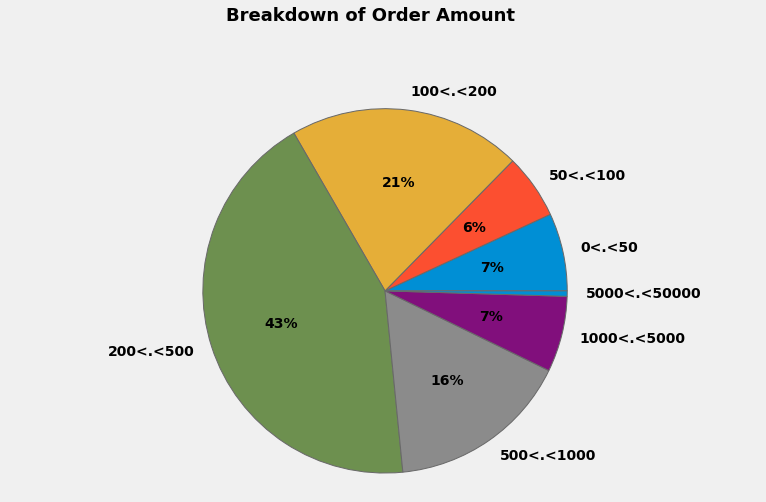

In [23]:
price_range = [0, 50, 100, 200, 500, 1000, 5000, 50000]
count_price = []

for i, price in enumerate(price_range):
    if i == 0: continue
    val = basket_price[(basket_price['BasketPrice'] < price) & (basket_price['BasketPrice'] > price_range[i-1])]['BasketPrice'].count()
    
    count_price.append(val)
    
#Visualization
plt.rc('font', weight = 'bold')
fig, ax = plt.subplots(figsize = (12, 7))
labels = ['{}<.<{}'.format(price_range[i-1], s) for i, s in enumerate(price_range) if i != 0]
size = count_price
explode = [0.0 if size[i] < 100 else 0.0 for i in range(len(size))]
ax.pie(size, explode = explode, labels = labels, autopct = lambda x: '{:1.0f}%'.format(x) if x > 1 else '',
      shadow = False, startangle = 0)
ax.axis('equal')
fig.text(0.5, 1.01, 'Breakdown of Order Amount', ha = 'center', fontsize = 18, fontweight = 'semibold')
plt.show()

From the pie chart, it shows that most customer spend £ 200 until £ 500.

# 3. Product Categories

In the dataframe, the StockCode variable shows the different product with its description in description variable. It is really interesting to retrieve the content and grouping it in the different categories

## 3.1 Description of Product

I am going to analyse the content in the **Description** variable by following this operation:
- Extract each name appearing in the description
- For each name, I extract the root word and set an aggregation with the particular root
- Count the number of root word appear
- If the several words are listed in root word, I consider to use the shortest name (the function will select the singular word instead pf plular)

In [24]:
#extract the singular word
noun = lambda pos: pos[:2] == 'NN'

def keywords(df, col = 'Description'):
    stemmer = nltk.stem.SnowballStemmer('english')
    keywords_roots = dict() #collect the words
    keywords_select = dict() 
    category_keys = []
    count_keywords = dict()
    count_i = 0
    for s in df[col]:
        if pd.isnull(s): continue 
        lines = s.lower()
        tokenized = nltk.word_tokenize(lines)
        nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if noun(pos)]
        
        for t in nouns:
            t = t.lower(); racine = stemmer.stem(t)
            if racine in keywords_roots:
                keywords_roots[racine].add(t)
                count_keywords[racine] += 1
            else:
                keywords_roots[racine] = {t}
                count_keywords[racine] = 1
    
    for s in keywords_roots.keys():
        if len(keywords_roots[s]) > 1:
            min_length = 1000
            for k in keywords_roots[s]:
                if len(k) < min_length:
                    clef = k; min_length = len(k)
            category_keys.append(clef)
            keywords_select[s] = clef
        else:
            category_keys.append(list(keywords_roots[s])[0])
            keywords_select[s] = list(keywords_roots[s])[0]
            
    print('Number of Keywords: {}'.format(len(category_keys)))
    return keywords_roots, keywords_select, category_keys, count_keywords
            

Once we have finished the function. Let's create new dataframe only show **Description** variable

In [25]:
data_description = pd.DataFrame(data['Description'].unique()).rename(columns={0:'Description'})
print('Number of Products:', len(data_description))

Number of Products: 4459


New dataframe particularly for **Description** has been made. Now we will show the number of keywords

In [26]:
keywords_roots, keywords_select, category_keys, count_keywords = keywords(data_description)

Number of Keywords: 1575


With the function above, the variable shows:
- `keywords` = the list of extracted words
- `keywords_roots` = the word that is based on the root word
- `count_keywords` = listing the number of words appear and count it

In [27]:
#changing the count_keywords from dictionary into list
list_products = []
for key, value in count_keywords.items():
    list_products.append([keywords_select[key],value])
list_products.sort(key = lambda x: x[1], reverse = True)

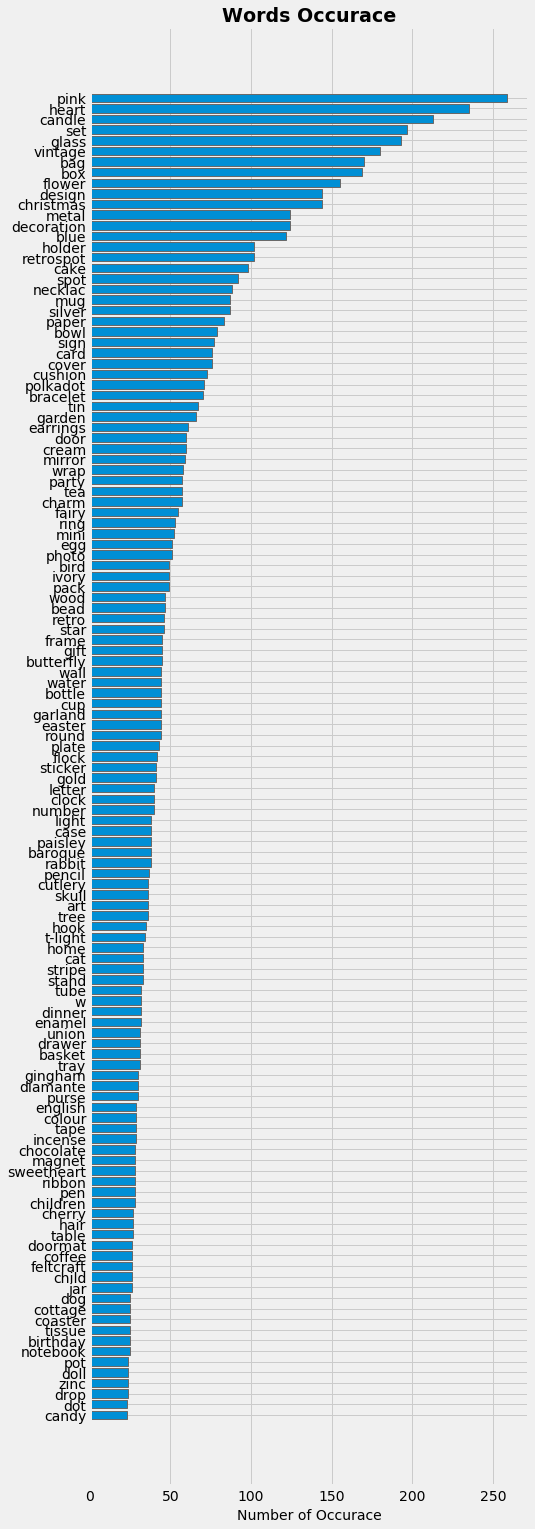

In [28]:
#Visualizing the keywords with horizontal bar
listing = sorted(list_products, key = lambda x: x[1], reverse = True)

plt.rc('font', weight = 'normal')
fig, ax = plt.subplots(figsize = (7,25))
y_axis = [i[1] for i in listing[:125]]
x_axis = [k for k, i in enumerate(listing[:125])]
x_label = [i[0] for i in listing[:125]]
plt.yticks(x_axis, x_label)
ax.barh(x_axis, y_axis, align = 'center')
ax = plt.gca()
ax.invert_yaxis()
plt.xticks(fontsize = 14)
plt.xlabel('Number of Occurace', fontsize = 14, labelpad = 5)
plt.title('Words Occurace', fontsize = 19, fontweight='semibold')
plt.show()

## 3.2 Product Categories 

In the product variables, we have known that there are 4459 different products with 1575 different keywords. However, we see from the bar chart that the highest keywords come from word 'pink'. Because I just want categorize the product not the color of the product, so I decide to delete the color keywords

In [29]:
list_products = []
for key, value in count_keywords.items():
    word = keywords_select[key]
    if word in ['pink','blue','green','tag','ass','set']: continue
    if len(word) < 3 or value < 13: continue
    if ('+' in word) or ('/' in word): continue
    list_products.append([word, value])
    
list_products.sort(key = lambda x:x[1], reverse = True)
print('The rest of Number of Keywords:',len(list_products))

The rest of Number of Keywords: 225


### 3.2.1 Data Encoding 

Keywords will be used to group the product

In [30]:
list_description = data_cleaned['Description'].unique()
X = pd.DataFrame()
for key, value in list_products:
    X.loc[:, key] = list(map(lambda x: int(key.upper() in x), list_description))

The X matrix indicates the word contained in the description of the products using *one-hot-encoding* priciple. I also add 6 more columns to the matrix to indicate the price range of the products

In [31]:
threshold = [0, 1, 2, 3, 5, 10]
label_col = []
for i in range(len(threshold)):
    if i == len(threshold) -1:
        col = '.>{}'.format(threshold[i])
    else:
        col = '{}<.<{}'.format(threshold[i], threshold[i+1])
    label_col.append(col)
    X.loc[:,col] = 0
    
for i, product in enumerate(list_description):
    prix = data_cleaned[data_cleaned['Description'] == product]['Price'].mean()
    j = 0
    while prix > threshold[j]:
        j += 1
        if j == len(threshold): break
    X.loc[i, label_col[j-1]] = 1

I check the number of products in the different group

In [32]:
print("{:<8} {:<20} \n".format('Group','Number of Products') + 20*'-')
for i in range(len(threshold)):
    if i == len(threshold)-1:
        col = '.>{}'.format(threshold[i])
    else:
        col = '{}<.<{}'.format(threshold[i], threshold[i+1])
    print("{:<10} {:<20}".format(col, X.loc[:, col].sum()))

Group    Number of Products   
--------------------
0<.<1      927                 
1<.<2      1168                
2<.<3      846                 
3<.<5      709                 
5<.<10     590                 
.>10       218                 


### 3.2.2 Clutering the Products 

In this section, I am going to group the product into the different classes. In this matrix with binary encoding using sklearn package such as **Kmodes**

In order to define the number of cluster that represents the best data, I use silhouette score:

In [33]:
matrix = X.to_numpy()
for n_clusters in range(3,15):
    kmeans = KMeans(init = 'k-means++', n_clusters = n_clusters,
                   n_init = 30)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    silhouette_avg = silhouette_score(matrix, clusters)
    print('n_cluster = ', n_clusters, "The Average of Silhouette Score:", silhouette_avg)

n_cluster =  3 The Average of Silhouette Score: 0.09826052201458683
n_cluster =  4 The Average of Silhouette Score: 0.12235346533423964
n_cluster =  5 The Average of Silhouette Score: 0.12241301002576893
n_cluster =  6 The Average of Silhouette Score: 0.1452893702656717
n_cluster =  7 The Average of Silhouette Score: 0.14191039683258028
n_cluster =  8 The Average of Silhouette Score: 0.1253705570364763
n_cluster =  9 The Average of Silhouette Score: 0.1225486371494755
n_cluster =  10 The Average of Silhouette Score: 0.11956600149639572
n_cluster =  11 The Average of Silhouette Score: 0.14368664006407647
n_cluster =  12 The Average of Silhouette Score: 0.12760738300365307
n_cluster =  13 The Average of Silhouette Score: 0.10624741757621342
n_cluster =  14 The Average of Silhouette Score: 0.12219240904692905


Silhouette analysis is one of the model to select the number of clusters. Based on the [Scikit Learn Documentation]('https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html'), the silhouette coefficient near +1 indicate the sample is far away from the neighboring clusters which is good and value of 0 indicates that sample is on or very close to the decision boundary between two neighboring clusters, and negative values indicate that those samples might be assigned to the wrong cluster.

In this practice, we obtain the scores of $ 0.1 \pm 0.05 $ after `n_clusters > 4`. On the other hand, I found the score will drop after the n_cluster > 6. I therefore choose to seperate the dataset into 5 clusters

In [34]:
#Checking the optimal n_clusters using elbow method
# sum_of_squared_distances = []
# for n_clusters in range(3,20):
#     kmeans = KMeans(init = 'k-means++', n_clusters = n_clusters, n_init = 30)
#     km = kmeans.fit(matrix)
#     sum_of_squared_distances.append(km.inertia_)
    
# K = range(3,20)
# plt.plot(K, sum_of_squared_distances, 'bx-')
# plt.xlabel('K')
# plt.ylabel('sum_of_squared_distances')
# plt.title('Elbom Method to Get Optimal K')
# plt.show()

In [35]:
n_clusters = 5
silhouette_avg = -1
while silhouette_avg < 0.143:
    kmeans = KMeans(init = 'k-means++', n_clusters = n_clusters, 
                   n_init = 30)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    silhouette_avg = silhouette_score(matrix, clusters)
    
    print('For Number of Cluster: ',n_clusters, 'The Silhouette Score: ',silhouette_avg)

For Number of Cluster:  5 The Silhouette Score:  0.1419986449158674
For Number of Cluster:  5 The Silhouette Score:  0.14349950996330577


### 3.2.2 Clutering the Products 

Here I check the all elements in 5 clusters

In [36]:
pd.Series(clusters).value_counts()

3    1168
2     927
4     846
1     808
0     709
dtype: int64

From the [Scikit Learn Documentation]('https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html'), to have an insight on the quality of the classification, we can represent the silhouette score in each element of the different clusters.

In [37]:
def component_silhouette(n_clusters, lim_x, mat_size, sample_silhouette_values, clusters):
    plt.rcParams["patch.force_edgecolor"] = True
    plt.style.use('fivethirtyeight')
    mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
    
    fig, ax1 = plt.subplots(1,1)
    fig.set_size_inches(8,8)
    ax1.set_xlim([lim_x[0], lim_x[1]])
    ax1.set_ylim([0, mat_size + (n_clusters + 1) * 10])
    y_lower = 10
    for i in range(n_clusters):
        clusters_silhouette_values = sample_silhouette_values[clusters == i]
        clusters_silhouette_values.sort()
        size_cluster_i = clusters_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        cmap = cm.get_cmap('Spectral')
        color = cmap(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, clusters_silhouette_values,
                         facecolor = color, edgecolor = color, alpha = 0.8)
        
        ax1.text(-0.03, y_lower + 0.5 * size_cluster_i, str(i), color = 'red', fontweight = 'bold',
                bbox = dict(facecolor = 'white', edgecolor = 'black', boxstyle = 'round, pad=0.3'))
        
        y_lower = y_upper + 10
        

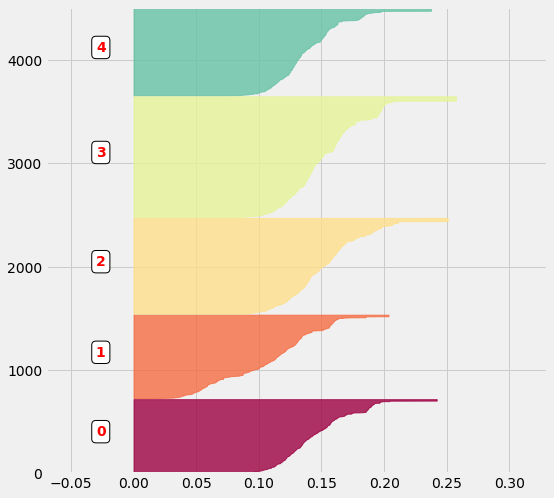

In [38]:
#Graphing the silhouette
sample_silhouette_values = silhouette_samples(matrix, clusters)
component_silhouette(n_clusters, [-0.07, 0.33], len(X), sample_silhouette_values, clusters)

After selecting the optimal cluster and show the insight on the quality of classification, I am going to show the global view of the contenst and determine which keywords are the most frequent.

In [39]:
list_ = pd.DataFrame(list_description)
list_words = [word for (word, occurance) in list_products]

occurence = [dict() for _ in range(n_clusters)]

for i in range(n_clusters):
    list_cluster = list_.loc[clusters == i]
    for word in list_words:
        if word in ['pink','blue','green','tag','ass','set']: continue
        occurence[i][word] = sum(list_cluster.loc[:,0].str.contains(word.upper()))

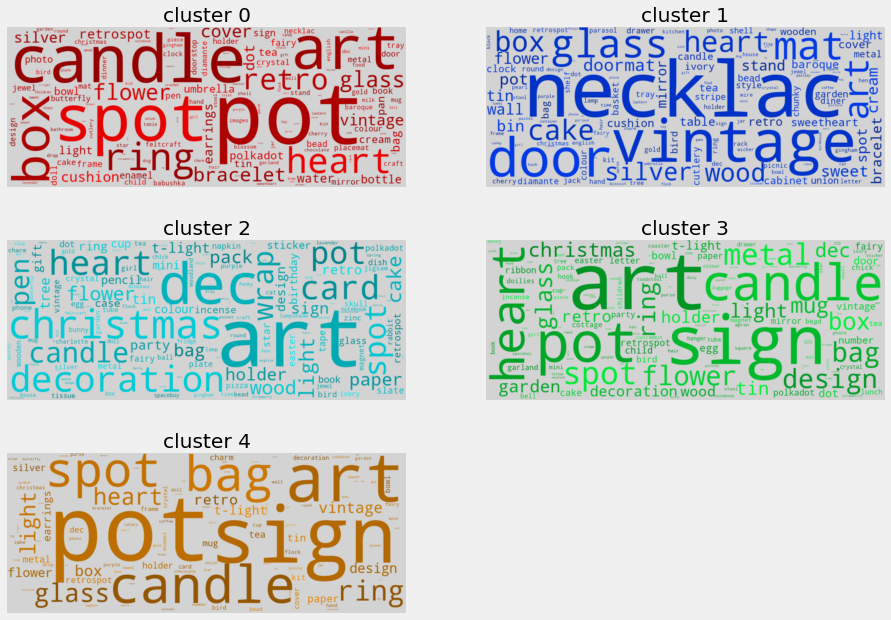

In [40]:
#colorring the cluster
def colors_cluster(word = None, position=None, font_size=None, orientation=None,
                  font_path=None, random_state=None):
    h = int(360.0 * tone / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)

#making the word
def wordcloud(list_, increment):
    ax1 = fig.add_subplot(4,2, increment)
    words = dict()
    trunc_occurences = list_[0:150]
    for s in trunc_occurences:
        words[s[0]] = s[1]
        
    wordcloud = WordCloud(width = 1000, height =400, background_color='lightgrey',
                         max_words = 1500, relative_scaling = 1,
                         color_func = colors_cluster, normalize_plurals=False)
    wordcloud.generate_from_frequencies(words)
    ax1.imshow(wordcloud, interpolation='bilinear')
    ax1.axis('off')
    plt.title('cluster {}'.format(increment-1))
    
fig = plt.figure(1, figsize=(14,14))
color = [0, 160, 130, 95, 280, 40, 330, 110,25]
for i in range(n_clusters):
    list_cluster_occurences = occurence[i]
    
    tone = color[i]
    list_ = []
    for key, value in list_cluster_occurences.items():
        list_.append([key, value])
    list_.sort(key = lambda x: x[1], reverse = True)
    wordcloud(list_, i+1)

From this clustering, we have obtained that one of the clusters contains objects that are associated with luxury items (keywords: necklace, bracelet, silver) and some of them are associated with gifts (keywords: christmas, party, candle, card). However, the keywords are also appeared in other clusters which is difficult to distinguish them.

**Principle Component Analysis**

In order to distinguish the objects clearly, I look at their composition. Given the large number of objects of the initial matrix, I do a PCA model

In [41]:
pca = PCA()
pca.fit(matrix)
pca_samples = pca.transform(matrix)

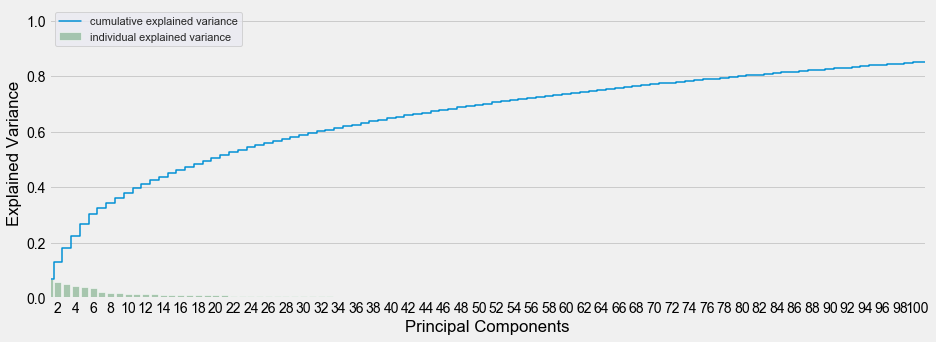

In [42]:
fig, ax = plt.subplots(figsize = (14,5))
sns.set(font_scale = 1)
plt.step(range(matrix.shape[1]), pca.explained_variance_ratio_.cumsum(),
        where = 'mid', label = 'cumulative explained variance')
sns.barplot(np.arange(1, matrix.shape[1]+1), pca.explained_variance_ratio_, alpha = 0.5,
           color = 'g', label = 'individual explained variance')
plt.xlim(0, 100)

ax.set_xticklabels([s if int(s.get_text()) % 2 == 0 else '' for s in ax.get_xticklabels()])
plt.ylabel('Explained Variance')
plt.xlabel('Principal Components')
plt.legend(loc = 'upper left')
plt.show()

We see that the number of components required to explain the data is necessarily important. We need more components to explain the 90% of variance of the data. However, I only keep the limited number of components due to use it only for visualizing the data

In [43]:
pca = PCA(n_components = 50)
matrix_new = pca.fit_transform(matrix)
prod = pd.DataFrame(matrix_new)
prod['cluster'] = pd.Series(clusters)

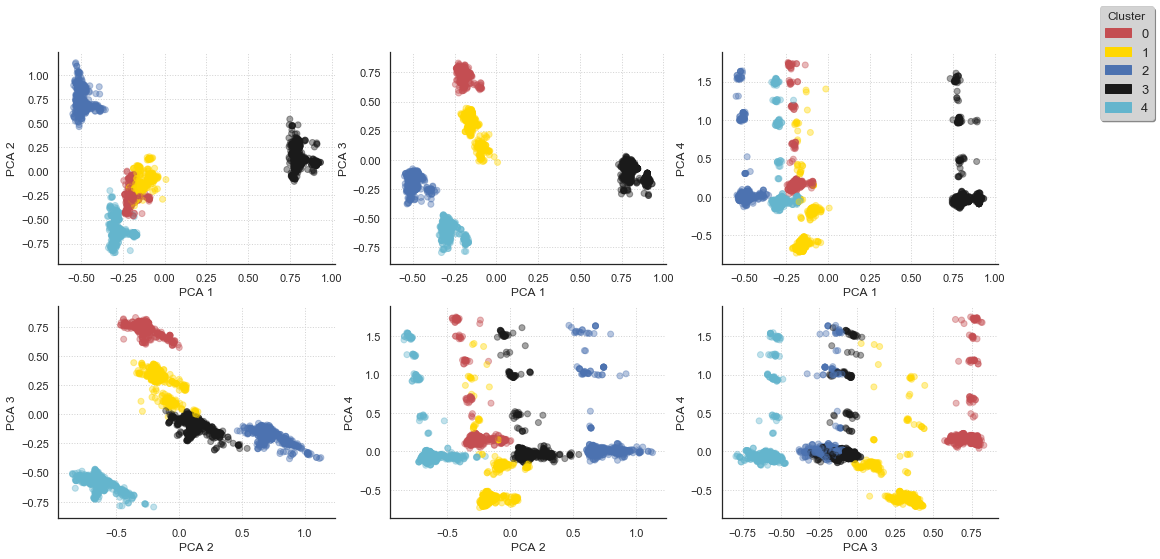

In [44]:
sns.set_style('white')
sns.set_context('notebook', font_scale = 1, rc={'lines.linewidth': 2.5})

color_map = {0:'r', 1:'gold', 2:'b', 3:'k', 4:'c', 5:'g',6:'tomato',7:'deeppink'}
label_color = [color_map[l] for l in prod['cluster']]

fig = plt.figure(figsize = (15,8))
increment = 0
for ix in range(4):
    for iy in range(ix+1, 4):
        increment += 1
        ax = fig.add_subplot(2, 3, increment)
        ax.scatter(prod[ix], prod[iy], c = label_color, alpha = 0.4)
        plt.ylabel('PCA {}'.format(iy+1), fontsize = 12)
        plt.xlabel('PCA {}'.format(ix+1), fontsize = 12)
        ax.yaxis.grid(color = 'lightgray', linestyle = ':')
        ax.xaxis.grid(color = 'lightgray', linestyle = ':')
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        
        if increment == 9: break
    if increment == 9: break
        
        
comp_handler = []
for i in range(5):
    comp_handler.append(mpatches.Patch(color = color_map[i], label = i))
    
plt.legend(handles = comp_handler, bbox_to_anchor = (1.1, 0.97),
          title = 'Cluster', facecolor = 'lightgrey', shadow = True,
          frameon = True, framealpha = 1, fontsize = 13, bbox_transform = plt.gcf().transFigure)

plt.show()

## 4 Customer Categories 

### 4.1 Grouping Products

From the previous section, we have finished to cluster the products into six clusters. In order to do the next analysis, I convert this information into datagrame. By doing this, I create categorical variable where I indicate the cluster of each product

In [45]:
cor = dict()
for key, value in zip(list_description, clusters):
    cor[key] = value
    
data_cleaned['category_product'] = data_cleaned.loc[:, 'Description'].map(cor)

After that, I create category_n columns that contains the amount of spent in each product category

In [46]:
for i in range(5):
    col = 'category_{}'.format(i)
    data_temp = data_cleaned[data_cleaned['category_product'] == i]
    price_temp = data_temp['Price'] * (data_temp['Quantity'] - data_temp['QuantityCanceled'])
    price_temp = price_temp.apply(lambda x:x if x > 0 else 0)
    data_cleaned.loc[:, col] = price_temp
    data_cleaned[col].fillna(0, inplace = True)

data_cleaned[['Invoice', 'Description', 'category_product', 'category_0','category_1','category_2','category_3', 'category_4']][:5]



Invoice                          Description  category_product  category_0  \
0  489434  15CM CHRISTMAS GLASS BALL 20 LIGHTS                 1         0.0   
1  489434                   PINK CHERRY LIGHTS                 1         0.0   
2  489434                  WHITE CHERRY LIGHTS                 1         0.0   
3  489434         RECORD FRAME 7" SINGLE SIZE                  4         0.0   
4  489434       STRAWBERRY CERAMIC TRINKET BOX                 3         0.0   

   category_1  category_2  category_3  category_4  
0        83.4         0.0         0.0         0.0  
1        81.0         0.0         0.0         0.0  
2        81.0         0.0         0.0         0.0  
3         0.0         0.0         0.0       100.8  
4         0.0         0.0        30.0         0.0


From this, we have categorize the product and followed by price. After this, I decide to collect all orders and put in a single entry. So I create new dataframe that contains for each order, the amount of basket, as well as the way it is distributed over the 5 categories of the product.

In [47]:
temp = data_cleaned.groupby(by = ['CustomerID', 'Invoice'], as_index = False)['Price'].sum()
basket_price = temp.rename(columns = {'Price':'Basket_Price'})

for i in range(5):
    col = 'category_{}'.format(i)
    temp = data_cleaned.groupby(by = ['CustomerID','Invoice'], as_index = False)[col].sum()
    basket_price.loc[:,col] = temp
    
data_cleaned['InvoiceDate_'] = data_cleaned['InvoiceDate'].astype('int64')
temp = data_cleaned.groupby(by = ['CustomerID','Invoice'], as_index = False)['InvoiceDate_'].mean()
data_cleaned.drop('InvoiceDate_', axis = 1, inplace=True)
basket_price.loc[:, 'InvoiceDate'] = pd.to_datetime(temp['InvoiceDate_'])

basket_price = basket_price[basket_price['Basket_Price'] > 0]
basket_price.sort_values('CustomerID', ascending=True)[:5]

CustomerID  Invoice  Basket_Price  category_0  category_1  category_2  \
0     12346.0   499763         27.05        3.25       23.80         0.0   
1     12346.0   513774        142.31        0.00      142.31         0.0   
2     12346.0  C495800        103.50        0.00        0.00         0.0   
3     12346.0  C514024        250.06        0.00        0.00         0.0   
4     12346.0  C525099          1.00        0.00        0.00         0.0   

   category_3  category_4                   InvoiceDate  
0         0.0         0.0 2010-03-02 13:08:00.000000000  
1         0.0         0.0 2010-06-28 13:53:00.000000256  
2         0.0         0.0 2010-01-26 17:27:00.000000000  
3         0.0         0.0 2010-06-30 11:22:00.000000000  
4         0.0         0.0 2010-10-04 09:54:00.000000000

### 4.1.2 Separating the data over time 

The dataframe basket_price contains information over the period of 12 months. One of the objectives will be to develop a model and anticipating the habits of customer visiting the sites, from their first visit. In order to be able to test the model in reality, I split the data set by retaining the first 10 months to develope the model and the last 2 months to test.

In [48]:
print('Initial transaction:', basket_price['InvoiceDate'].min())
print('Last transaction', basket_price['InvoiceDate'].max())

Initial transaction: 2009-12-01 07:45:00
Last transaction 2010-12-09 20:01:00.000000768


In [49]:
#keep date only
basket_price['InvoiceDate'] = basket_price['InvoiceDate'].dt.date

In [50]:
train_data = basket_price[basket_price['InvoiceDate'] < datetime.date(2010,10,1)]
test_data = basket_price[basket_price['InvoiceDate'] >= datetime.date(2010,10,1)]
basket_price = train_data.copy(deep = True)

### 4.1.3 Consumer Combinations 

After grouping the transaction, I will group the transaction each customer. Thus, I determine the number of purchase made by the user, as well as the minimum, maximum, average amounts and the total amount spent during all visits.

In [51]:
transaction_user = basket_price.groupby(by=['CustomerID'])['Basket_Price'].agg(['count','min','max','mean','sum'])

for i in range(5):
    col = 'category_{}'.format(i)
    transaction_user.loc[:,col] = basket_price.groupby(by=['CustomerID'])[col].sum()/transaction_user['sum']*100
    


In [52]:
transaction_user.reset_index(drop = False, inplace = True)
basket_price.groupby(by=['CustomerID'])['category_0'].sum()
transaction_user['CustomerID'] = transaction_user['CustomerID'].astype('int64')
transaction_user.sort_values('CustomerID', ascending=True)[:5]

CustomerID  count    min     max        mean     sum  category_0  \
0       12346      4  27.05  250.06  130.730000  522.92    0.621510   
1       12348      1  14.39   14.39   14.390000   14.39    0.000000   
2       12349      3  24.15  200.00  139.576667  418.73   16.561985   
3       12355      1  52.78   52.78   52.780000   52.78  254.926108   
4       12358      2  24.65   95.84   60.245000  120.49    0.000000   

    category_1   category_2  category_3  category_4  
0    31.765853     0.000000    0.000000    0.000000  
1     6.949270  1053.231411  483.669215    0.000000  
2   161.605330    19.200917   77.133236   28.443150  
3   262.788935   155.513452  222.773778   28.988253  
4  1093.534733   102.083160  178.960910   34.608681

In ecommerce, it is interesting to see the customers who only make one purchase. One of the objectives is to target this customer in order to retain them. So, I try to calculate how many customer who make one purchase

In [53]:
one_purchase = transaction_user[transaction_user['count'] == 1].shape[0]
total_users = transaction_user.shape[0]

print("Number of users who only make one purchase: ", one_purchase)
print("In percentage: {:.2f}%".format(one_purchase/total_users*100))

Number of users who only make one purchase:  1187
In percentage: 32.67%


There are 32.67% of users who only make one purchase

## 4.2 Creating Customer Categories 

### 4.2.1 Data Encoding 

In [54]:
columns = ['count', 'min', 'max', 'mean', 'category_0',
            'category_1', 'category_2', 'category_3', 'category_4']

selected_customer = transaction_user.copy(deep = True)
matrix = selected_customer[columns].to_numpy()

In practice, the different variables have the different range of variation and before analysing the rest, I create a matrix to standardize the data

In [55]:
scaler = StandardScaler()
scaler.fit(matrix)
print(scaler.mean_)
scaled_matrix = scaler.transform(matrix)

[  4.66363887  53.78317754 129.64310652  81.99296121 168.10006462
 158.48260882 473.32534135 390.28598667 210.09059934]


### 4.2.2 Clustering the Customer 

In this section, I do the same thing in product to cluster the customer using KMeans from `scikit-learn`. I already iterate number of clusters and get the best silhouette scores with 9 clusters

In [56]:
n_clusters = 11
kmeans = KMeans(init = 'k-means++', n_clusters = n_clusters, n_init=100)
kmeans.fit(scaled_matrix)
clusters_customers = kmeans.predict(scaled_matrix)
silhouette_avg = silhouette_score(scaled_matrix, clusters_customers)
print(' n_cluster:', n_clusters, '\n','The Average of Silhouette Score:', silhouette_avg)

 n_cluster: 11 
 The Average of Silhouette Score: 0.6272967558199661


In the previous section, we use `principle componen analysis` to distinguish the object clearly, I also use PCA in customer to obtain the best quality of the separation of the different groups

In [57]:
pca = PCA()
pca.fit(scaled_matrix)
pca_samples = pca.transform(scaled_matrix)

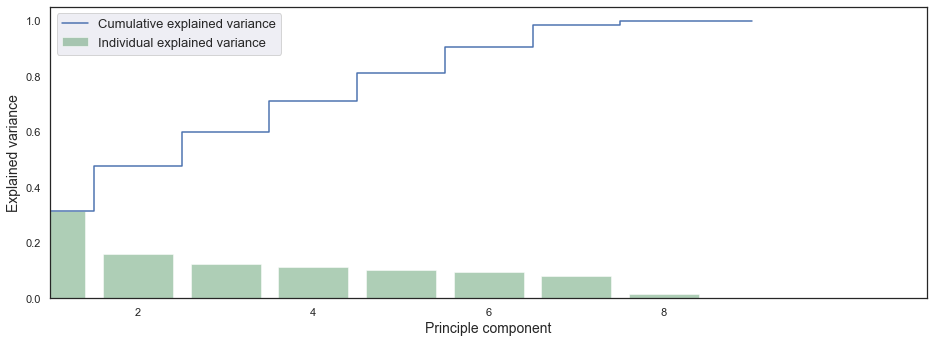

In [58]:
fig, ax = plt.subplots(figsize=(14,5))
sns.set(font_scale = 1)
plt.step(range(matrix.shape[1]), pca.explained_variance_ratio_.cumsum(), where = 'mid',
        label = 'Cumulative explained variance')
sns.barplot(np.arange(1, matrix.shape[1] + 1), pca.explained_variance_ratio_, alpha=0.5,
           color = 'g', label='Individual explained variance')
plt.xlim(0, 10)

ax.set_xticklabels([s if int(s.get_text())%2 == 0 else '' for s in ax.get_xticklabels()])

plt.legend(loc='best', fontsize = 13)
plt.xlabel('Principle component', fontsize = 14)
plt.ylabel('Explained variance', fontsize = 14)
plt.show()

I check the number of customers in each cluster

In [59]:
pd.DataFrame(pd.Series(clusters_customers).value_counts(), columns = ['Number of Users']).T

0    10  3   4   5   9   6   8   2   7   1 
Number of Users  3307  271  13  12   8   7   7   3   3   1   1

As we already operate PCA model and to get around 90% of .... we need 8 components of PCA to create a representation of the various clusters

In [60]:
pca = PCA(n_components = 6)
matrix_pca = pca.fit_transform(scaled_matrix)
mat = pd.DataFrame(matrix_pca)
mat['cluster'] = pd.Series(clusters_customers)

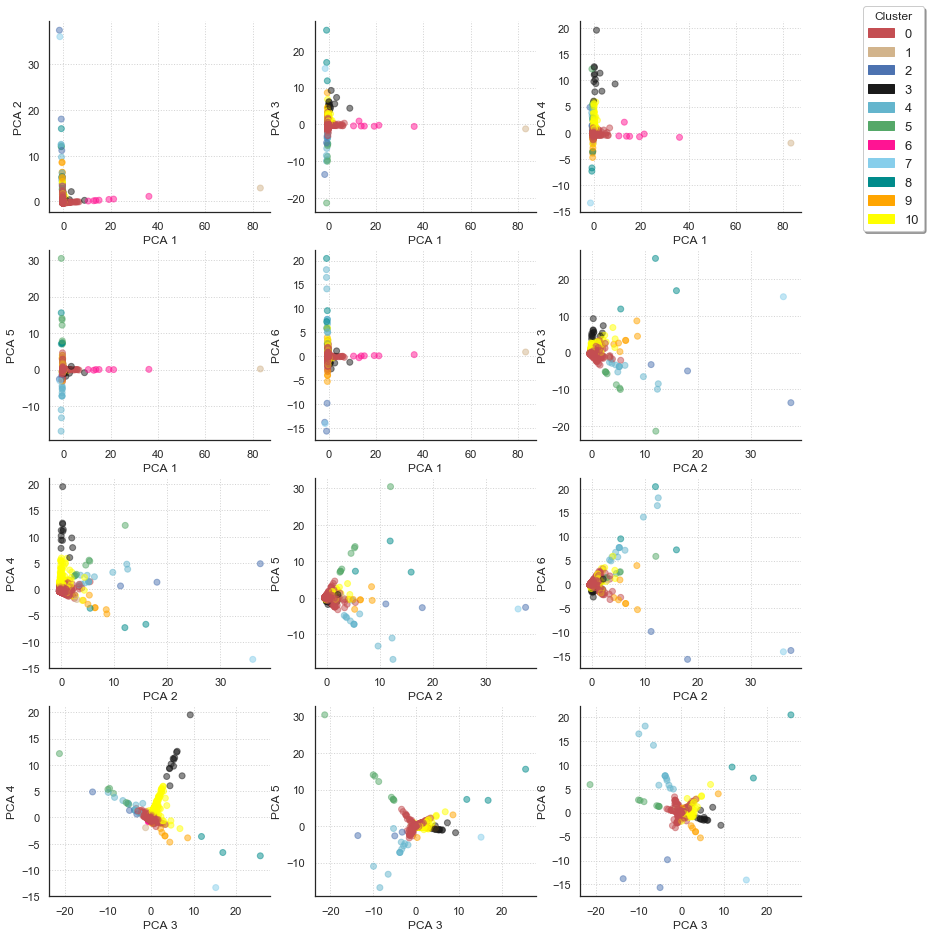

In [61]:
sns.set_style('white')
sns.set_context('notebook', font_scale = 1, rc={'lines.linewidth': 2.5})

color_map = {0:'r', 1:'tan', 2:'b', 3:'k', 4:'c', 5:'g', 6:'deeppink', 7:'skyblue', 8:'darkcyan', 9:'orange',
             10:'yellow', 11:'tomato', 12:'seagreen'}

label_color = [color_map[l] for l in mat['cluster']]

fig = plt.figure(figsize = (12,15))
increment = 0
for ix in range(6):
    for iy in range(ix+1, 6):
        increment += 1
        ax = fig.add_subplot(4, 3, increment)
        ax.scatter(mat[ix], mat[iy], c = label_color, alpha = 0.5)
        plt.ylabel('PCA {}'.format(iy+1), fontsize = 12)
        plt.xlabel('PCA {}'.format(ix+1), fontsize = 12)
        ax.yaxis.grid(color = 'lightgray', linestyle = ':')
        ax.xaxis.grid(color = 'lightgray', linestyle = ':')
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        
        if increment == 12: break
    if increment == 12: break
        
comp_handler = []
for i in range(n_clusters):
    comp_handler.append(mpatches.Patch(color = color_map[i], label = i))

plt.legend(handles = comp_handler, bbox_to_anchor=(1.1, 0.9), title = 'Cluster',
          facecolor = 'white', shadow = True, frameon = True, framealpha = 1,
          fontsize = 13, bbox_transform = plt.gcf().transFigure)

plt.tight_layout(pad = 30)
# fig.tight_layout(pad = 15.0)


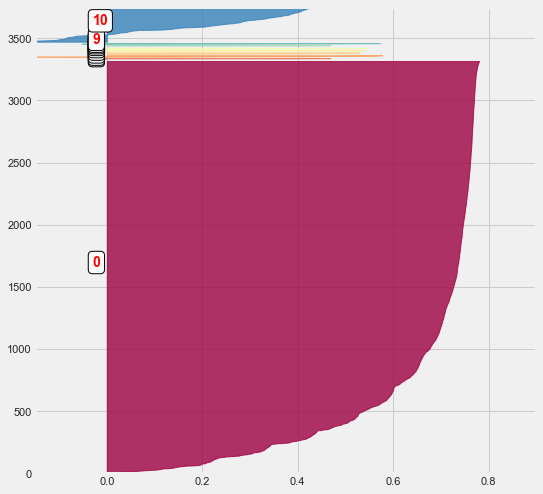

In [62]:
#Graphing the silhouette
sample_silhouette_values = silhouette_samples(scaled_matrix, clusters_customers)
component_silhouette(n_clusters, [-0.15, 0.9], len(scaled_matrix), sample_silhouette_values, clusters_customers)

The above sections shows that most customers are in the first cluster

___

The following section, It remains to understand the behaviour of customers in each cluster. I am going to start adding the selected_customers dataframe that defines the cluster to which each customer belong

In [63]:
selected_customer.loc[:, 'cluster'] = clusters_customers

In [64]:
selected_customer.head()

CustomerID  count    min     max        mean     sum  category_0  \
0       12346      4  27.05  250.06  130.730000  522.92    0.621510   
1       12348      1  14.39   14.39   14.390000   14.39    0.000000   
2       12349      3  24.15  200.00  139.576667  418.73   16.561985   
3       12355      1  52.78   52.78   52.780000   52.78  254.926108   
4       12358      2  24.65   95.84   60.245000  120.49    0.000000   

    category_1   category_2  category_3  category_4  cluster  
0    31.765853     0.000000    0.000000    0.000000        0  
1     6.949270  1053.231411  483.669215    0.000000        0  
2   161.605330    19.200917   77.133236   28.443150        0  
3   262.788935   155.513452  222.773778   28.988253        0  
4  1093.534733   102.083160  178.960910   34.608681        0

After this, I am going to average the contents by selecting the different group of customer. For example, I do average the basket price, total sum spents by cutomer in different cluster. Then, I determine the number of clients in each group.

In [65]:
data_merged = pd.DataFrame()
for i in range(n_clusters):
    test = pd.DataFrame(selected_customer[selected_customer['cluster'] ==i].mean())
    test = test.T.set_index('cluster', drop = True)
    test['size'] = selected_customer[selected_customer['cluster'] == i ].shape[0]
    data_merged = pd.concat([data_merged, test])

data_merged.drop('CustomerID', axis = 1, inplace=True)
print('The amount of Customers', data_merged['size'].sum())

data_merged = data_merged.sort_values('sum')

The amount of Customers 3633


In [66]:
data_merged = data_merged.reset_index()
data_merged['cluster'] = data_merged['cluster'].astype('int64')
data_merged

cluster       count           min           max          mean  \
0         5    1.625000      0.427500      0.427500      0.427500   
1         2    1.333333      3.683333      3.683333      3.683333   
2         7    1.000000     10.500000     10.500000     10.500000   
3         9    2.428571      5.865714      7.328571      6.638810   
4         4    3.416667      1.432500      6.147500      2.756493   
5         8    1.666667      9.056667     24.210000     16.041111   
6         0    3.136982     40.687812    101.978556     66.522658   
7        10   18.837638      3.277601    160.225059     49.522917   
8         3  104.538462      1.080769   1434.726923     87.464173   
9         6    3.285714   4959.418571   6620.588571   5438.359870   
10        1    1.000000  25111.090000  25111.090000  25111.090000   

             sum    category_0    category_1     category_2    category_3  \
0       0.653750      0.000000      0.000000  102512.500000      0.000000   
1       4.246667   4039.941263      0.000000   23336.270191   9634.067548   
2      10.500000  73300.000000   3809.523810    2217.142857  11065.523810   
3      14.552857  15201.238918   1038.897439       0.000000   2164.834578   
4      19.079167     58.153846     59.384615    6440.674652  32888.825727   
5      37.523333   5571.235475  17409.882418       0.000000   1357.608358   
6     196.496825    107.788879    122.208814     210.840896    261.960879   
7     926.270085    154.726904    368.162470     186.979504    339.485493   
8    9522.844615    236.136000    593.641112     157.899391    441.541158   
9   15876.421429      1.271793     15.619735       0.276524      0.493876   
10  25111.090000      0.000000      0.000000       0.000000      0.000000   

      category_4  size  
0       0.000000     8  
1   47110.279001     3  
2   13200.000000     1  
3     219.532671     7  
4     112.657557    12  
5    1932.540257     3  
6     158.628615  3307  
7     262.005308   271  
8     342.205986    13  
9       0.731937     7  
10      0.000000     1

In [67]:
# liste_index = []
# for i in range(5):
#     column = 'category_{}'.format(i)
#     liste_index.append(data_merged[data_merged[column] > 45].index.values[0])

# liste_index_reordered = liste_index
# liste_index_reordered += [ s for s in data_merged.index if s not in liste_index]

# data_merged = data_merged.reindex(index = liste_index_reordered)
# data_merged = data_merged.reset_index(drop = False)
# display(data_merged[['cluster', 'count', 'min', 'max', 'mean', 'sum', 'category_0',
#                    'category_1', 'category_2', 'category_3', 'category_4', 'size']])

Radar chart is another method to visualize our data with more interactive. You may find the radar chart article from this [kernel](https://www.kaggle.com/yassineghouzam/don-t-know-why-employees-leave -read-this)

In [68]:
def _scale_data(data, ranges):
    (x1, x2) = ranges[0]
    d = data[0]
    return [(d - y1) / (y2 - y1) * (x2 - x1) + x1 for d, (y1, y2) in zip(data, ranges)]

class RadarChart():
    def __init__(self, fig, location, sizes, variables, ranges,
                n_ordinate_levels = 6):
        angles = np.arange(0, 360, 360./len(variables))
        
        ix, iy = location[:]; size_x, size_y = sizes[:]
        
        axes = [fig.add_axes([ix, iy, size_x, size_y], polar = True,
                            label = "axes{}".format(i)) for i in range(len(variables))]
        
        _, text = axes[0].set_thetagrids(angles, labels = variables)
        
        for txt, angle in zip(text, angles):
            if angle > -1 and angle < 181:
                txt.set_rotation(angle - 90)
            else:
                txt.set_rotation(angle - 270)
                
        for ax in axes[1:]:
            ax.patch.set_visible(False)
            ax.xaxis.set_visible(False)
            ax.grid('off')
            
        for i, ax in enumerate(axes):
            grid = np.linspace(*ranges[i], num = n_ordinate_levels)
            grid_label = [""]+["{:.0f}".format(x) for x in grid[1:-1]]
            ax.set_rgrids(grid, labels = grid_label, angle = angles[i])
            ax.set_ylim(*ranges[i])
            
        self.angle = np.deg2rad(np.r_[angles, angles[0]])
        self.ranges = ranges
        self.ax = axes[0]
        
    def plot(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.plot(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

    def fill(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.fill(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

    def legend(self, *args, **kw):
        self.ax.legend(*args, **kw)
        
    def title(self, title, *args, **kw):
        self.ax.text(0.9, 1, title, transform = self.ax.transAxes, *args, **kw)


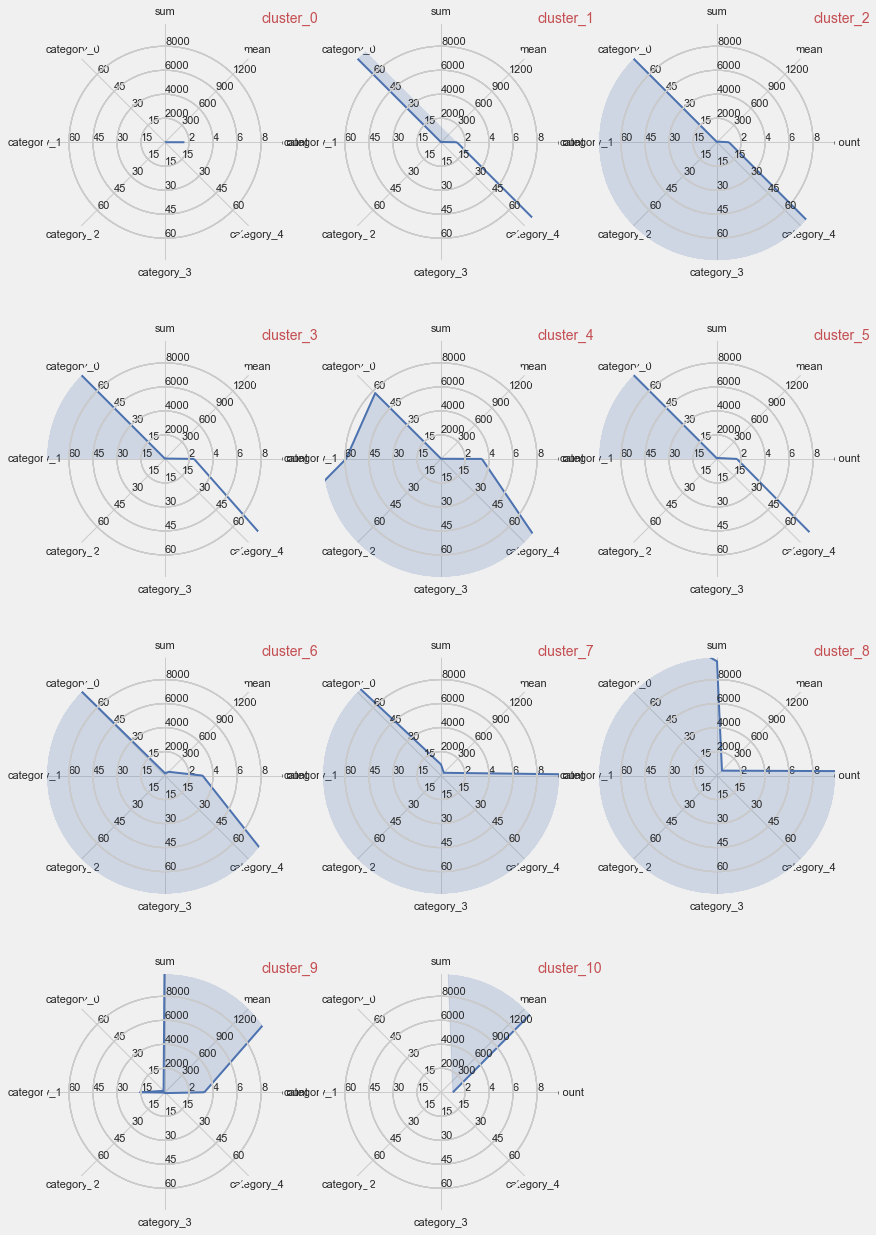

In [69]:
fig= plt.figure(figsize = (10, 1.3))

attributes = ['count', 'mean', 'sum', 'category_0', 'category_1', 'category_2',
             'category_3', 'category_4']

ranges = [[0.01, 10], [0.01, 1500], [0.01, 10000], [0.01, 75], [0.01, 75], [0.01, 75], [0.01, 75], [0.01, 75]]
index = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

n_groups = n_clusters;  i_cols = 3
i_rows = n_groups//i_cols
size_x, size_y = (1/i_cols), (i/i_rows)

for ind in range(n_clusters):
    ix = ind%3; iy = i_rows - ind//3
    pos_x = ix*(size_x + 0.05); pos_y = iy*(size_y + 0.05)
    location = [pos_x, pos_y]; sizes = [size_x, size_y]
    
    data = np.array(data_merged.loc[index[ind], attributes])
    radar = RadarChart(fig, location, sizes, attributes, ranges)
    radar.plot(data, color = 'b', linewidth=2.0)
    radar.fill(data, alpha = 0.2, color = 'b')
    radar.title(title = 'cluster_{}'.format(index[ind]), color = 'r')
    ind += 1

# 5. Classification of Customers

In this section, I am going to make an objective to classify the customer in the difference categories that were established in th previous section. To achieve the objective, I create a test several classifier implemented in `scikit-learn`

In [93]:
class Class(object):
    def __init__(self, clf, params=None):
        if params:
            self.clf = clf(**params)
        else:
            self.clf = clf()
            
    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)
        
    def predict(self, x):
        return self.clf.predict(x)
    
    def grid_search(self, parameters, Kfold):
        self.grid = GridSearchCV(estimator = self.clf, param_grid = parameters, cv = Kfold)
        
    def grid_fit(self, X, Y):
        self.grid.fit(X, Y)
        
    def grid_predict_test(self, X, Y):
        self.predictions = self.grid.predict(X)
        print("Testing Accuracy: {:.2f}%".format(100*metrics.accuracy_score(Y, self.predictions)))
        
    def grid_predict_train(self, X, Y):
        self.predictions = self.grid.predict(X)
        print("Training Accuracy: {:.2f}%".format(100*metrics.accuracy_score(Y, self.predictions)))

Because the goal is to define the class to which the customer belongs, as soon as its first visit, I only keep the variable that describe the content of the basket, and do not take into account the variables related the frequency of visits or variations of the basket price overtime

In [94]:
columns = ['mean', 'category_0','category_1', 'category_2', 'category_3', 'category_4']
X = selected_customer[columns]
Y = selected_customer['cluster']

In [95]:
#Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

Before using machine learning models, I create OOP to test the quality of the prediction in each model. The test to qualify the prediction is using learning curve. In particular, this type of curves allow to detect possible drawbacks in the model, linked for example to over and under fitting. In order to draw this curve, I use [scikit learn documentation](http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-)

___

I summarize underfit, overfit and good fit:
- Underfit learning curves:
    - If The training loss remains flat regardless of training.
    - The training loss continues to decrease until the end of training.
    
- Overfit learning curves:
    - The plot of training loss continues to decrease with experience.
    - The plot of validation loss decreases to a point and begins
    increasing again.
    
- Good fit learning curves:
    - The plot of training loss decreases to a point of stability.
    - The plot of validation loss decreases to a point of stability and
    has a small gap with the training loss.
    
You can read more the explaination from [machinelearningmastery](https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/)

In [96]:
def plot_learning_curve(estimator, title, X, Y, ylim = None, cv = None,
                       n_jobs = 1, train_sizes = np.linspace(.1, 1.0, 10)):
    """
    Generate the plot of test and training learning curve
    """
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('Training Sample')
    plt.ylabel('Score')
    train_sizes, train_scores, test_scores = learning_curve(estimator,
                                                           X, Y, cv=cv, n_jobs=n_jobs,
                                                           train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis = 1)
    train_scores_std = np.std(train_scores, axis = 1)
    test_scores_mean = np.mean(test_scores, axis = 1)
    test_scores_std = np.std(test_scores, axis = 1)
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                    train_scores_mean + train_scores_std, alpha = 0.1, color = 'r')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                    test_scores_mean + test_scores_std, alpha = 0.1, color = 'g')
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label = 'Training Score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label = 'Cross-validation curve')
    
    plt.legend(loc='best')
    return plt

## 5.2 Logistic Regression 

From the previous section, I already create `Class` class, and adjust the model on the training data and show how the predictions compare the real values

In [97]:
lr = Class(clf = LogisticRegression)
lr.grid_search(parameters = [{'C':np.logspace(-2, 2,20)}], Kfold = 5)
lr.grid_fit(X = X_train, Y = Y_train)
lr.grid_predict_test(X_test, Y_test)
lr.grid_predict_train(X_train, Y_train)

Testing Accuracy: 86.52%
Training Accuracy: 88.44%


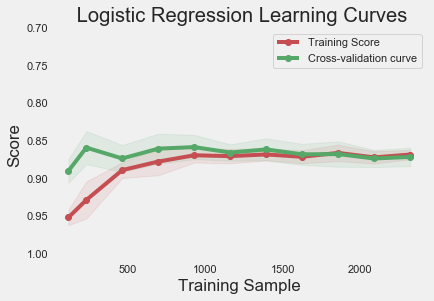

In [98]:
g = plot_learning_curve(lr.grid.best_estimator_, ' Logistic Regression Learning Curves',
                       X_train, Y_train, ylim = [1.01, 0.7], cv = 5,
                       train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

From the above curve, we can see that the train and cross validation curves converge towards the same limit when the sample size increases. Model using logistic regression shows that the model is not overfitting. We can see also that the accuracy of training curve is correct with low bias. Hence the model does not underfit the data

## 5.2 K-Nearest Neighbors Classifier

Now I test another model to do a classification using KNN

In [99]:
knn = Class(clf = KNeighborsClassifier)
knn.grid_search(parameters = [{'n_neighbors':np.arange(1,50,1)}], Kfold = 5)
knn.grid_fit(X = X_train, Y = Y_train)
knn.grid_predict_test(X_test, Y_test)
knn.grid_predict_train(X_train, Y_train)

Testing Accuracy: 90.10%
Training Accuracy: 92.67%


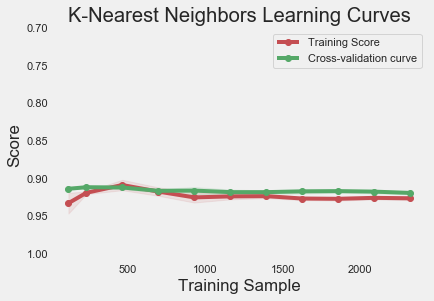

In [100]:
g = plot_learning_curve(knn.grid.best_estimator_, 'K-Nearest Neighbors Learning Curves',
                       X_train, Y_train, ylim = [1.01, 0.7], cv = 5,
                       train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

## 5.3 Support Vector Machine Classifier (SVC) 

In [101]:
svc = Class(clf = svm.LinearSVC)
svc.grid_search(parameters = [{'C': np.logspace(-2, 2, 10)}], Kfold = 4)
svc.grid_fit(X = X_train, Y = Y_train)
svc.grid_predict_test(X_test, Y_test)
svc.grid_predict_train(X_train, Y_train)

Testing Accuracy: 87.90%
Training Accuracy: 90.30%


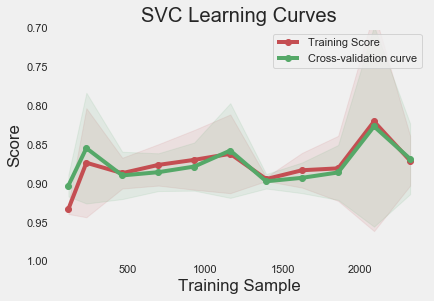

In [102]:
g = plot_learning_curve(svc.grid.best_estimator_, 'SVC Learning Curves',
                       X_train, Y_train, ylim = [1.0, 0.7], cv = 5,
                       train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

SVC learning Curves show that the score drops when the sample size increases. There is an indication that the SVC model underfit the data

## 5.4 Decision Tree 

In [103]:
dt = Class(clf = DecisionTreeClassifier)
dt.grid_search(parameters = [{'criterion':['entropy', 'gini'], 
                             'max_features': ['sqrt', 'log2']}], Kfold = 5)
dt.grid_fit(X = X_train, Y = Y_train)
dt.grid_predict_test(X_test, Y_test)
dt.grid_predict_train(X_train, Y_train)

Testing Accuracy: 85.28%
Training Accuracy: 100.00%


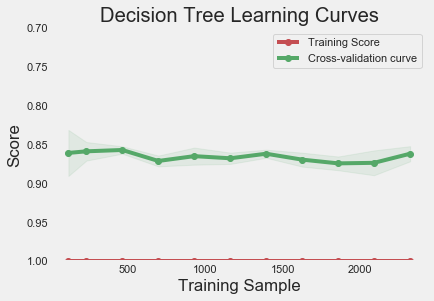

In [104]:
g = plot_learning_curve(dt.grid.best_estimator_, 'Decision Tree Learning Curves',
                       X_train, Y_train, ylim = [1.0, 0.7], cv = 5,
                       train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

## 5.4 Random Forest

In [105]:
rf = Class(clf = RandomForestClassifier)
param_grid = {'criterion': ['entropy','gini'], 
              'n_estimators': [20, 40, 60, 80, 100], 
              'max_features': ['sqrt','log2']}
rf.grid_search(parameters = param_grid, Kfold = 5)
rf.grid_fit(X = X_train, Y = Y_train)
rf.grid_predict_test(X_test, Y_test)
rf.grid_predict_train(X_train, Y_train)

Testing Accuracy: 90.78%
Training Accuracy: 100.00%


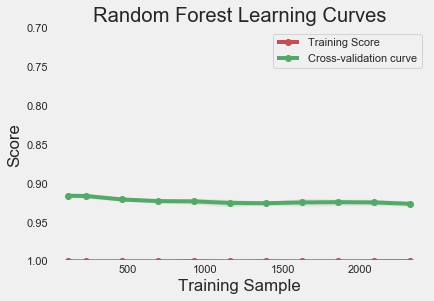

In [106]:
g = plot_learning_curve(rf.grid.best_estimator_, 'Random Forest Learning Curves',
                       X_train, Y_train, ylim = [1.0, 0.7], cv = 5,
                       train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

## 5.6 Gradient Boosting Classifier

In [107]:
gb = Class(clf = GradientBoostingClassifier)
param_grid = {'n_estimators': [20, 40, 60, 80, 100]}
gb.grid_search(parameters = param_grid, Kfold = 5)
gb.grid_fit(X = X_train, Y = Y_train)
gb.grid_predict_test(X_test, Y_test)
gb.grid_predict_train(X_train, Y_train)

Testing Accuracy: 89.55%
Training Accuracy: 94.01%


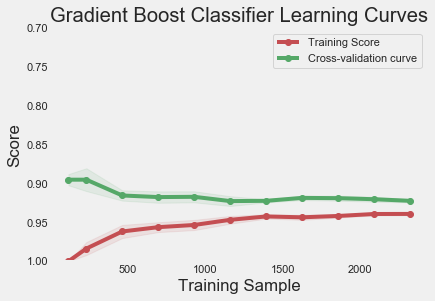

In [112]:
g = plot_learning_curve(gb.grid.best_estimator_, 'Gradient Boost Classifier Learning Curves',
                       X_train, Y_train, ylim = [1.0, 0.7], cv = 5,
                       train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

In the previous section, I already summarize how our model is in underfiting, overfiting or good fit.

Based on the learning curves, we get that Random forest and Decision Tree is not really good compared to the other because the training and cross-validation have a wide gap. The SVC model shows that is not too god because the training and cross validation is not stable.

Therefore, we use Gradient boost, KNN, and Logistic regression

___

Then, I define a classifier to merge Gradient boost, KNN, and logistic regression:

In [118]:
gb_best = GradientBoostingClassifier(**gb.grid.best_params_)
lr_best = LogisticRegression(**lr.grid.best_params_)
knn_best = KNeighborsClassifier(**knn.grid.best_params_)

In [122]:
voting_classifier = VotingClassifier(estimators = [('gb',gb_best),
                                                           ('lr',lr_best),
                                                           ('knn',knn_best)], voting = 'soft')

In [123]:
voting_classifier = voting_classifier.fit(X_train, Y_train)

In [127]:
predictions = voting_classifier.predict(X_test)
predictions_train = voting_classifier.predict(X_train)
print("Training Accuracy: {:.2f}&".format(100*metrics.accuracy_score(Y_train, predictions_train)))
print("Testing Accuracy: {:.2f}&".format(100*metrics.accuracy_score(Y_test, predictions)))

Training Accuracy: 92.74&
Testing Accuracy: 90.23&


It seems like combining three models shows a good result with the highest accuracy for the test data 90.23%. After this, I will use this to testing the prediction in the next section

# 6. Testing the predictions

In [ ]:
train_data = basket_price[basket_price['InvoiceDate'] < datetime.date(2010,10,1)]
test_data 

In the previous section, we have done to create a model for our last 10 months as a train_data. In this section, I am going to test the model with the next two months as test_data

In [128]:
testing_data = test_data.copy(deep = True)

We have a several steps in the following section:
1. I am going to regroup these data according to the same procedures as used on the training data.
2. I convert the dataframe into a matrix and retain only the specific variables. I will use the same procedure as used on the training data

In [138]:
transaction_by_user = testing_data.groupby(by=['CustomerID'])['Basket_Price'].agg(['count','min','max','mean','sum'])
for i in range(5):
    col = 'category_{}'.format(i)
    transaction_by_user.loc[:,col] = testing_data.groupby(by=['CustomerID'])[col].sum()/transaction_by_user['sum']*100
    
transaction_by_user.reset_index(drop = False, inplace = True)

transaction_by_user['sum'] = transaction_by_user['count'] * transaction_by_user['mean']

transaction_by_user.sort_values('CustomerID', ascending = True)[:5]




CustomerID  count     min     max     mean     sum  category_0  category_1  \
0     12346.0      1    1.00    1.00    1.000    1.00    0.000000    0.000000   
1     12347.0      2   73.36   89.59   81.475  162.95  169.591899  110.273090   
2     12349.0      1  480.76  480.76  480.760  480.76   20.238789  163.782345   
3     12351.0      1   49.46   49.46   49.460   49.46   60.048524   25.778407   
4     12352.0      2   12.45   42.15   27.300   54.60    0.000000  111.996337   

   category_2  category_3  category_4  
0    0.000000    0.000000    0.000000  
1  123.338447  206.014115  202.884320  
2   25.709294   55.000416   27.019719  
3  147.998383  207.197736  167.408006  
4   39.560440  266.483516  211.630037

In [139]:
#Converting data into matrix
columns = ['count', 'min', 'max', 'mean', 'category_0',
       'category_1', 'category_2', 'category_3', 'category_4']

matrix_test = transaction_by_user[columns].to_numpy()
scaled_matrix_test = scaler.transform(matrix_test)

In [142]:
Y = kmeans.predict(scaled_matrix_test)
X_columns = ['mean', 'category_0','category_1', 'category_2', 'category_3', 'category_4']
X = transaction_by_user[X_columns]

We have done to prepare our test_data to be used into the prediction. After this, I will use VotingClassifier that previously is combined with three models (Gradient Boosting, KNN, Logistic Regression)

In [148]:
predictions = voting_classifier.predict(X)
print("Accuracy: {:.2f}%".format(100*metrics.accuracy_score(Y, predictions)))

Accuracy: 97.92%


# 7. Summary 

This notebook uses data from [UCI machine learning](https://archive.ics.uci.edu/ml/datasets/Online+Retail+II) which contains the data of customers on E-commerce platform from 2019-12-01 until 2010-12-09. There are 4383 customers and I have classified the customer with the total number of transactions during that year.

First step, I group the different product into 5 categories. Second step, I perform a classification of customer into 11 categories based on the type of products they usually buy, the number of visits and the amount spent during 10 months. The last step, I tried to do a classification to train the first 10 months with several models.

Finally, I use the last two months to test the predictions that I made before and then I found 97.92% of customers are awarded the right classes. 

There are another point of views how this data could give the best performance with little bias such as we use data more than one year to look more about the behaviour of the customer. 

Thank you for the time you read this notebook and I am looking for your feedback.

Resources Used:
- [FabienDaniel](https://www.kaggle.com/fabiendaniel) as my baseline to analyse this dataset.
- [Scikit Learn Classifier](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) as my baseline to use classification machine learning model.
- [Scikit Learn Learning Curve](https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/) as my baseline to use learning curve analyses